# Types of Batch Processing/ Gradient Descent

We’ll use a simple linear regression example: y = 3x + 4 with some noise.

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic data: y = 4 + 3x + noise
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

**Gradient Descent Implementations**

In [ ]:
def compute_gradient(X, y, weights):
    n = len(y)
    y_pred = X.dot(weights)
    error = y_pred - y
    gradients = 2/n * X.T.dot(error)
    return gradients

**Batch Gradient Descent (BGD)**

In [ ]:
def batch_gradient_descent(X, y, lr=0.1, epochs=100):
    X_b = np.c_[np.ones((len(X), 1)), X]  # Add bias term
    weights = np.zeros((2, 1))

    for epoch in range(epochs):
        gradients = compute_gradient(X_b, y, weights)
        weights -= lr * gradients
    return weights

**Stochastic Gradient Descent (SGD)**

In [ ]:
def stochastic_gradient_descent(X, y, lr=0.1, epochs=100):
    X_b = np.c_[np.ones((len(X), 1)), X]
    weights = np.zeros((2, 1))
    n = len(X)

    for epoch in range(epochs):
        for i in range(n):
            rand_i = np.random.randint(n)
            xi = X_b[rand_i:rand_i+1]
            yi = y[rand_i:rand_i+1]
            gradients = compute_gradient(xi, yi, weights)
            weights -= lr * gradients
    return weights

**Mini-batch Gradient Descent**

In [ ]:
def mini_batch_gradient_descent(X, y, lr=0.1, epochs=100, batch_size=20):
    X_b = np.c_[np.ones((len(X), 1)), X]
    weights = np.zeros((2, 1))
    n = len(X)

    for epoch in range(epochs):
        indices = np.random.permutation(n)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, n, batch_size):
            xi = X_b_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = compute_gradient(xi, yi, weights)
            weights -= lr * gradients
    return weights

**Compare All Methods**

In [ ]:
#w_bgd = batch_gradient_descent(X, y)
#w_sgd = stochastic_gradient_descent(X, y)
#w_mbgd = mini_batch_gradient_descent(X, y)

#print("Batch GD Weights:", w_bgd.ravel())
#print("Stochastic GD Weights:", w_sgd.ravel())
#print("Mini-batch GD Weights:", w_mbgd.ravel())

In [ ]:
import time

# Batch Gradient Descent
start_bgd = time.time()
w_bgd = batch_gradient_descent(X, y)
end_bgd = time.time()
time_bgd = end_bgd - start_bgd

# Stochastic Gradient Descent
start_sgd = time.time()
w_sgd = stochastic_gradient_descent(X, y)
end_sgd = time.time()
time_sgd = end_sgd - start_sgd

# Mini-batch Gradient Descent
start_mbgd = time.time()
w_mbgd = mini_batch_gradient_descent(X, y)
end_mbgd = time.time()
time_mbgd = end_mbgd - start_mbgd

# Print Results
print("Batch GD Weights:", w_bgd.ravel(), "Time:", round(time_bgd, 4), "seconds")
print("Stochastic GD Weights:", w_sgd.ravel(), "Time:", round(time_sgd, 4), "seconds")
print("Mini-batch GD Weights:", w_mbgd.ravel(), "Time:", round(time_mbgd, 4), "seconds")


Batch GD Weights: [4.18844784 2.9983734 ] Time: 0.0016 seconds
Stochastic GD Weights: [4.31987165 3.15199557] Time: 0.1533 seconds
Mini-batch GD Weights: [4.18853197 2.93880479] Time: 0.0086 seconds


**Interpretation:**

**Batch GD** is the fastest per epoch since it computes gradient once.

**SGD** takes more time due to one update per sample.

**Mini-batch** is a good trade-off in terms of speed and stability.

| Type              | Updates per Epoch  | Convergence    | Noise  |
| ----------------- | ------------------ | -------------- | ------ |
| **Batch GD**      | 1 (all samples)    | Stable         | Low    |
| **SGD**           | n (one per sample) | Fast but noisy | High   |
| **Mini-batch GD** | n / batch\_size    | Balanced       | Medium |


# Overfit/Bestfit/Underfit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

Generate data


In [ ]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Sort X for smooth plotting


In [ ]:
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)

Define models of different complexity

In [ ]:
models = {
    "Underfit (Degree 1)": make_pipeline(PolynomialFeatures(1), LinearRegression()),
    "Best Fit (Degree 2)": make_pipeline(PolynomialFeatures(2), LinearRegression()),
    "Overfit (Degree 15)": make_pipeline(PolynomialFeatures(15), LinearRegression())
}


Plot

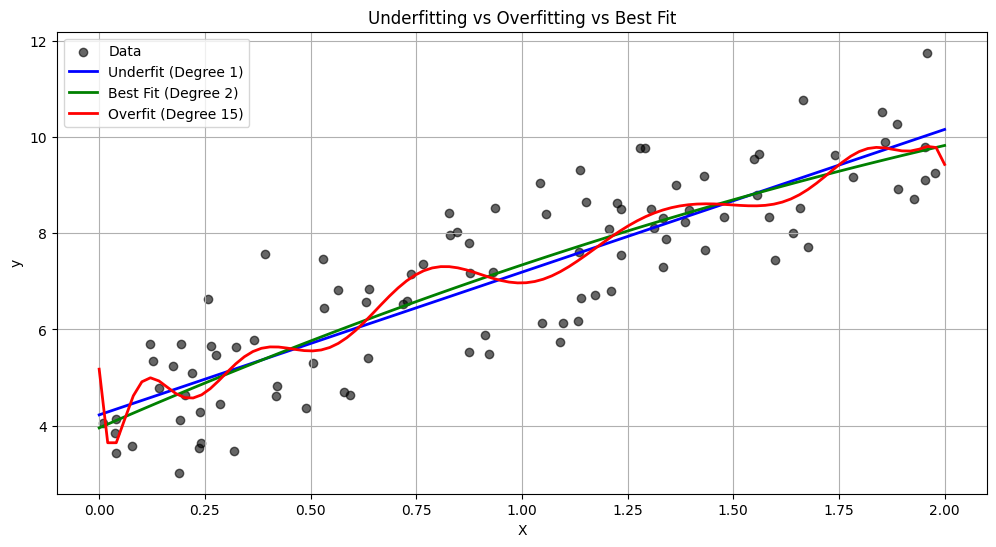

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='black', label="Data", alpha=0.6)

colors = ['blue', 'green', 'red']
for (label, model), color in zip(models.items(), colors):
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, label=label, color=color, linewidth=2)

plt.title("Underfitting vs Overfitting vs Best Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


Excercise: https://github.com/arsenyturin/SGD-From-Scratch